# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [38]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [39]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [41]:
# Checking the shape of data and printing result
df.shape
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [42]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are total of 9 columns, 5 columns with numerical values and 4 columns with string values
* order_id and customer_id is integer and indicate unique IDs
* restaurant_name and cuisine_type are string objects indicating the name of restaurants and cuisine served in the restaurant
* cost_of_the_order is a float value as currency will be in dollars and cents
* day_of_the_week is a string object and indicates if the order was placed on a Weekend or a Weekday (Categorical).
* rating column is of the object type.
* food_preparation_time and delivery_time are integers indicating time in minutes
* All the columns have exactly 1898 observations indicating there are no missing values in the data



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [43]:
# The below code is used to find missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The above indicates that there are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

* **cost_of_the_order:** On average the cost of order is 16.49 dollars. The min cost is 4.47 dollars and maximum cost of order is 35.41 dollars
* **food_preparation_time:** **The minimum time for food to be prepared once the order is placed is 20min, average time is 27.37min and maximum time for food to be prepared is 35min**
* delivery_time: The average time to deliver food is 24.16 minutes, minimum time is 15 minutes and maximum time is 33 minutes. This indicates the time once food has been picked up from the restuarant and the order is delivered to customer.
* Since order_id and customer_id are unique identifiers, interpreting its summary statistics will not yeild meaningful insights

### **Question 5:** How many orders are not rated? [1 mark]

In [45]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [46]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [47]:
df.rating.value_counts(normalize = True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
* The orders that are not rated are marked as 'Not given'. There are 736 orders (38.77% of the total orders) that do not have a rating.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

There are 5 numerical columns in the dataset. Of these order_id and customer_id are id columns and hence histograms/boxplots/countplots will not provide meaningful insights. We can perform an analysis on remaining 3 numerical columns - cost_of_the_order, food_preparation_time and delivery_time.

Analysis of categorical variables like Cuisine Type and Rating can also be performed using countplots


## **6.1 Analysis of Cost of Order**

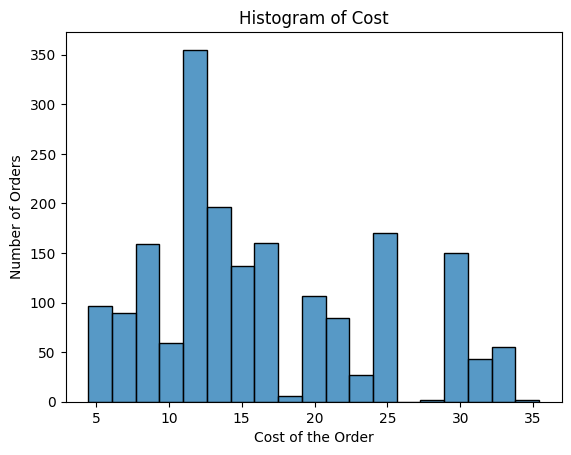

In [48]:
sns.histplot(data=df, x='cost_of_the_order')
plt.xlabel('Cost of the Order')
plt.ylabel('Number of Orders')
plt.title('Histogram of Cost')
plt.show()


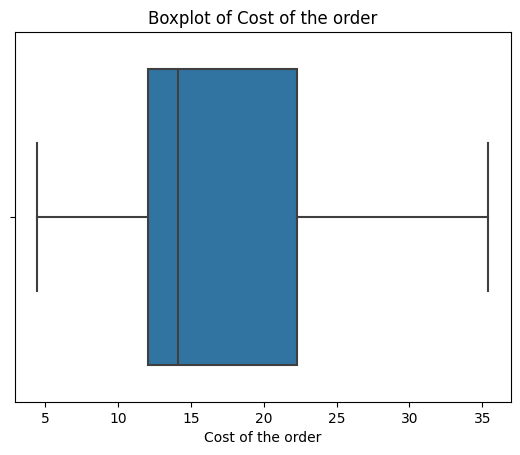

In [49]:
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Boxplot of Cost of the order')
plt.xlabel('Cost of the order')
plt.show()

**Observations on Cost of Order:**
* The graph is right skewed
* The minimum cost of order is 4.47 dollars and maximum cost of the order is around 35.4 dollars
* The median cost of order is around 14 dollars
* Maximum orders cost between 11 dollars and 15 dollars. Q1 is around 12 dollars and Q3 is around 23 dollars
* There are few orders that are more than 32 dollars
* There are no outliers present in this data

# **6.2 Analysis of Food preparation time**

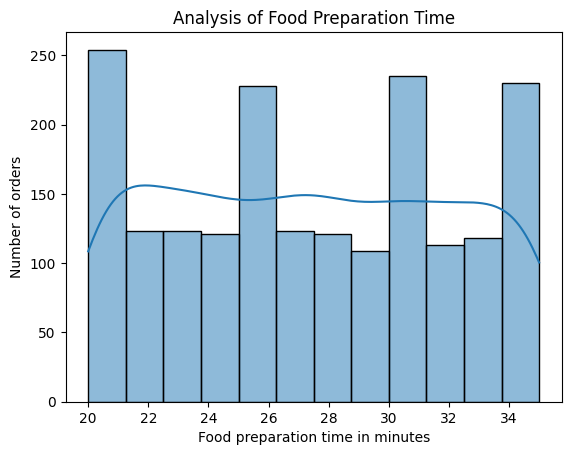

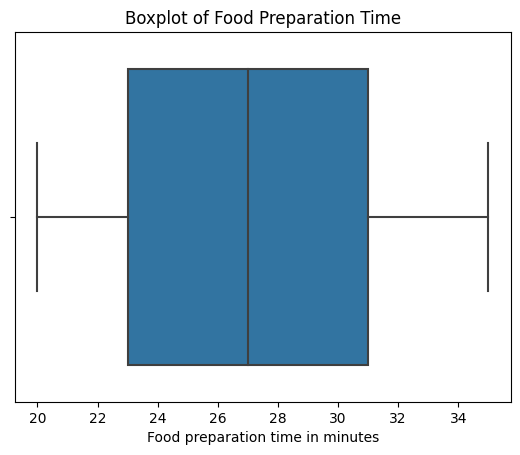

In [50]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title('Analysis of Food Preparation Time')
plt.xlabel('Food preparation time in minutes')
plt.ylabel('Number of orders')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food preparation time in minutes')
plt.show()

***Observations on Food Preparation Time ***
* The average time to prepare food is around 27 minutes. Minimum time to prepare food is 20 minutes and maximum time to prepare food is around 35 minutes
* There are no outliers in the data. The distribution is close to normal distribution (very lightly right skewed)
* The preparation time for most of the orders is evenly spread between 23 minutes and 31 minutes. There are multiple peaks observed in orders at certain time slots which indicates there are other factors contributing to that distribution.


## **6.3 Analysis of Delivery Time**

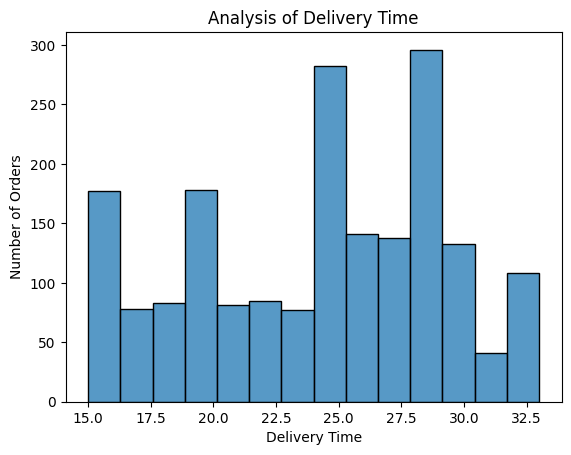

In [51]:
sns.histplot(data=df, x='delivery_time')
plt.title('Analysis of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Number of Orders')
plt.show()


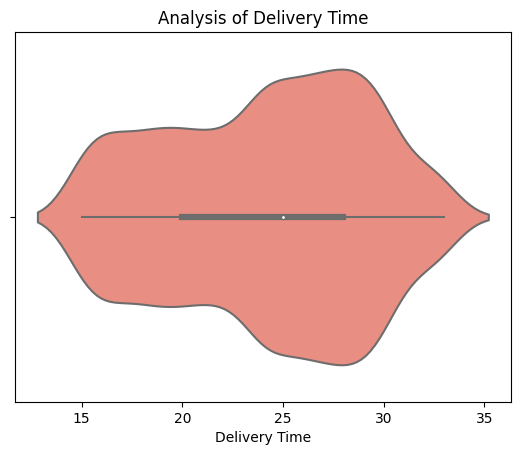

In [52]:
#Violin plot for delivery time
sns.violinplot(data=df, x='delivery_time', color='salmon')
plt.xlabel('Delivery Time')
plt.title('Analysis of Delivery Time')
plt.show()

Observations on Delivery Time
* The data is left skewed indicating most of the orders are delivered in less than 30 minutes
* The average delivery time is 25min


# **6.4 Analysis of Cuisine Type**

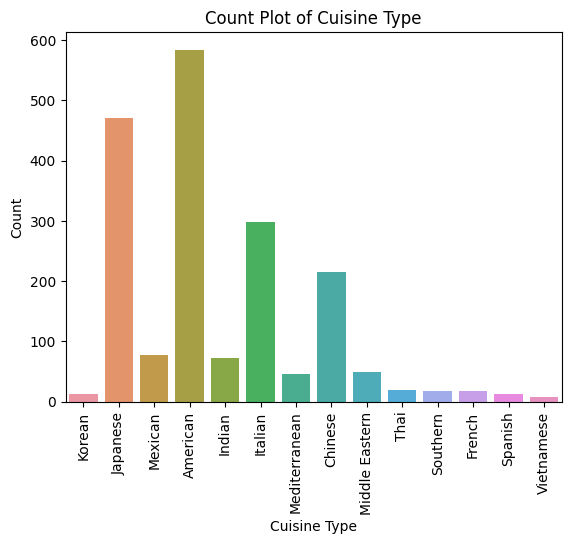

In [53]:
#Countplot for cuisine type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Count Plot of Cuisine Type')
plt.show()

**Observations of Cuisine type**
* It can be observed that American cuisine is the most popular cuisine type followed by Japanese and Italian
* Vietnamese, Spanish, French and Southern are least favourite cuisines ordered by customers.

# **6.5 Analysis of Rating**

In [54]:
#Find the number of orders rated as 5,4,3,'Not given'
rating_counts = df['rating'].value_counts()
print('Count of each rating type: ')
print(rating_counts)
print('Total number of orders is ', df['rating'].count())

Count of each rating type: 
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
Total number of orders is  1898


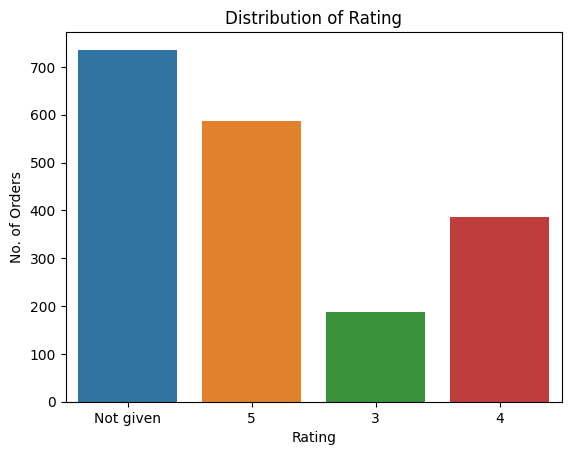

In [55]:
#Analysis of Rating (Categorical variable) using countplot
sns.countplot(data=df, x='rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Orders')
plt.show()

**Observations**
* Of the orders that are rated, most of the orders have a high rating of 5(588 orders), followed by 4 (386 orders) and 3 (188 orders)
* 736 of the 1898 are not rated.

# **6.6 Day of the Week Analysis**

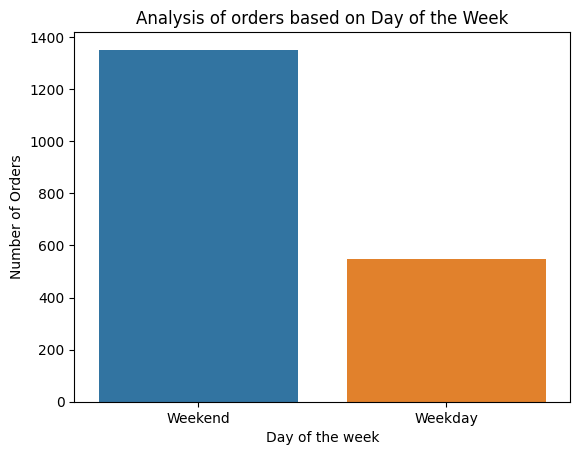

In [56]:
#Countplot for number of orders based on the day of the week (Weekday/weekend)
sns.countplot(data=df, x='day_of_the_week')
plt.title('Analysis of orders based on Day of the Week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Orders')
plt.show()

**Observations**
* There are more number of orders placed during the weekend than during the week.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [57]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

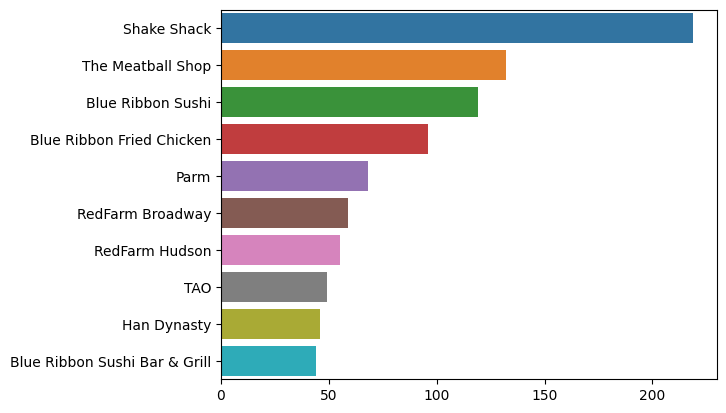

In [58]:
top_res = df['restaurant_name'].value_counts().head(10)
sns.barplot(x = top_res.values, y=top_res.index)
plt.show()

#### **Observations**:
The top 5 restaurants in terms of number of orders received are as follows:

1.  Shake Shack
2.  The Meatball Shop
3.  Blue Ribbon Sushi
4.  Blue Ribbon Fried Chicken
5.  Parm



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

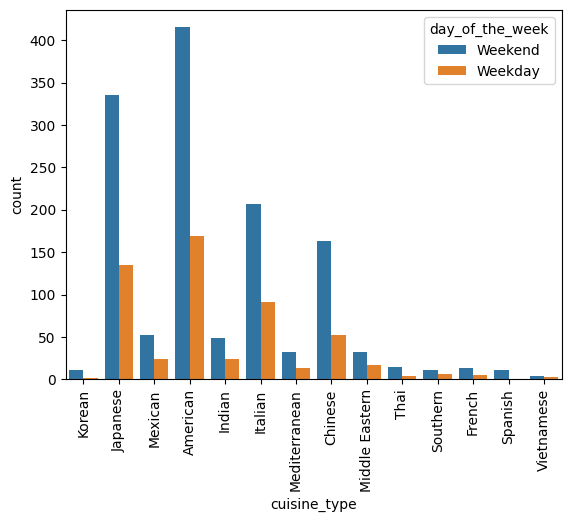

In [59]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Based on the plot above, the most popular cuisine over weekend is "American"

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [60]:
df.loc[df['cost_of_the_order']>20].shape[0]

555

**To find the percentage of orders that cost more than 20 dollars**

In [61]:
total_above_20 = (df['cost_of_the_order']>20).mean()*100
print(total_above_20)

29.24130663856691


#### Observations:
1. There are total of 555 orders that are greater than 20 dollars
2. From the above, we find that 29.24 percentage of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [62]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [63]:
df['customer_id'].value_counts().head(3)


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64



#### **Observations**:

Top 3 customer_id along with the number of orders is as below:


1. Customer_id 52832 placed   13 orders
2. Customer_id 47440 placed   10 orders
3. Customer_id 83287 placed 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In order to perform multivariate analaysis we need to convert the Ratings column from object type to integer type. This will help analyze the rating of orders wrt cuisine, food preparation time and the delivery time.

Almost 39% of the orders are not rated. To derive more meaningful insights from the data, I have imputed the 'Not given' rating with the median of the ratings (4).

**Step 1: Converting Rating column from Object datatype to Int datatype**

In [64]:
#Check the datatype of column rating
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [65]:
#Copy the dataframe to build a clean dataframe with ratings populated
clean_df = df.copy()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [66]:
#Convert the rating column from object type to int type
clean_df['rating'] = pd.to_numeric(clean_df['rating'], errors = 'coerce')  #Convert to numeric, replace not given with nan
clean_df['rating'].fillna(0, inplace=True) #Replace all nan values with 0
clean_df['rating'] = clean_df['rating'].astype(int) #convert the rating column datatype to Int


In [67]:
#Check the datatype of rating column. This should be int type now.
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


In [68]:
#Find out the number of unique values of ratings in clean_df
clean_df['rating'].value_counts()

0    736
5    588
4    386
3    188
Name: rating, dtype: int64

***Now Replace the values in column Rating with value of 0, by the median ***

In [69]:
median_rating = clean_df['rating'].median()
median_rating.dtype

dtype('float64')

In [71]:
#Convert the datatype of median_rating from float to int
median_rating = median_rating.astype(int)
print('The datatype if median_rating is: ', median_rating.dtype)
print('Median of the rating is :', median_rating)

The datatype if median_rating is:  int64
Median of the rating is : 4


In [72]:
#Replace 0 rating with the median rating
clean_df['rating'] = clean_df['rating'].replace(0, median_rating)
clean_df['rating'].value_counts()

4    1122
5     588
3     188
Name: rating, dtype: int64

## **Correlation between the numerical variables**

---

There are 6 numerical variables in the dataframe. We will perform correlation analysis between the 'Cost of the order', 'delivery time', 'food preparation time' and 'rating' with each other.

<ipython-input-73-8fdfaf0fc88e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)


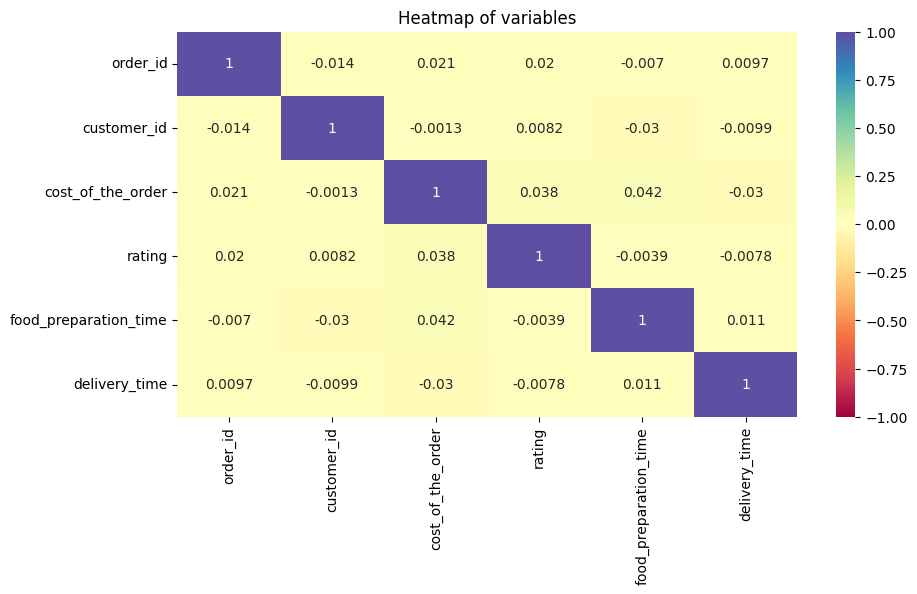

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(clean_df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Heatmap of variables')
plt.show()

**Observations**
1. We should not consider the correlation value with customer_id and order_id as these are unique identifiers for customers and orders, and increase or decrease in customer_id or order_id values in this will not impact any other feature or provide valuable insights.
2. The Cost of the order is positively correlated to Food preparation time which means that as the cost of order increases the time taken to prepare food increases, or it indicates a larger order placed by the customer and hence takes longer to prepare the food.
3. The cost of the order is negatively correlated to the delivery time. This does not make sense, as irrespective of the cost of order the delivery time will vary based on the distance of customer, traffic conditions etc.
4. Delivery time and food preparation time is negatively correlated, which means as food preparation time goes up the delivery time reduces. But like the above observation, this correlation does not provide any valuable insight as food preparation time is dependent on other variables like the size of order, type of cuisine.
4. The rating is negatively correlated to food preparation time and delivery time indicating that orders that are prepared fast and delivered fast have higher rating or lower the delivery time, higher the rating of the order

## **Analysis for Categorical Variables**

---
Below section analyzes the distribution of variables based on different categories
1. Box plots have been utilized for cost based on the type of cuisine, delivery time based on the day of the week.
2. Pair plots have been utilized to visualize the relationship between multiple numerical variables



In [74]:
#Finding out the restaurants that have highest number of orders in the clean_df
top10_restuarant_orders = clean_df.groupby('restaurant_name').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)
top10_restuarant_orders

<ipython-input-74-d07439952e18>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_restuarant_orders = clean_df.groupby('restaurant_name').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)


,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Shake Shack'),
  Text(1, 0, 'The Meatball Shop'),
  Text(2, 0, 'Blue Ribbon Sushi'),
  Text(3, 0, 'Blue Ribbon Fried Chicken'),
  Text(4, 0, 'Parm'),
  Text(5, 0, 'RedFarm Broadway'),
  Text(6, 0, 'RedFarm Hudson'),
  Text(7, 0, 'TAO'),
  Text(8, 0, 'Han Dynasty'),
  Text(9, 0, 'Blue Ribbon Sushi Bar & Grill')])

<Figure size 2000x600 with 0 Axes>

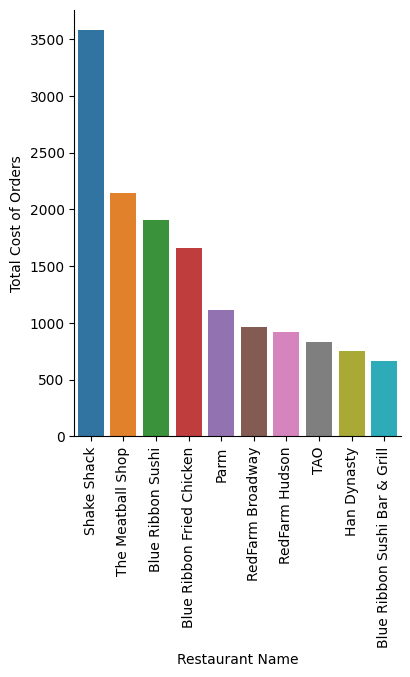

In [75]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_restuarant_orders, x='restaurant_name', y='cost_of_the_order', kind='bar')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Cost of Orders')
plt.xticks(rotation=90)

In [76]:
#Finding out the restaurants that have lowest number of orders
bottom10_restuarant_orders = clean_df.groupby('restaurant_name').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().tail(10)
bottom10_restuarant_orders

<ipython-input-76-21fad7f1e991>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bottom10_restuarant_orders = clean_df.groupby('restaurant_name').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().tail(10)


,restaurant_name,cost_of_the_order
168,Gaia Italian Cafe,8.78
169,Chola Eclectic Indian Cuisine,8.73
170,Woorijip,8.25
171,'wichcraft,8.10
172,La Follia,8.05
173,Market Table,6.79
174,Wa Jeal,6.74
175,Cipriani Le Specialita,5.92
176,Big Wong Restaurant _¤¾Ñ¼,5.92
177,Hunan Manor,5.72


In [77]:
#Finding out the Top10 Cuisine Types
top_cuisine_orders = clean_df.groupby('cuisine_type').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)
top_cuisine_orders

<ipython-input-77-4f410e93789b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_cuisine_orders = clean_df.groupby('cuisine_type').sum()[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)


,cuisine_type,cost_of_the_order
0,American,9530.78
1,Japanese,7663.13
2,Italian,4892.77
3,Chinese,3505.62
4,Mexican,1303.85
5,Indian,1235.14
6,Middle Eastern,922.21
7,Mediterranean,711.84
8,Thai,364.95
9,French,356.29


<ipython-input-78-5d58a583df0f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='cuisine_type', y='cost_of_the_order', data=clean_df, estimator=sum, ci=None, hue = 'day_of_the_week')


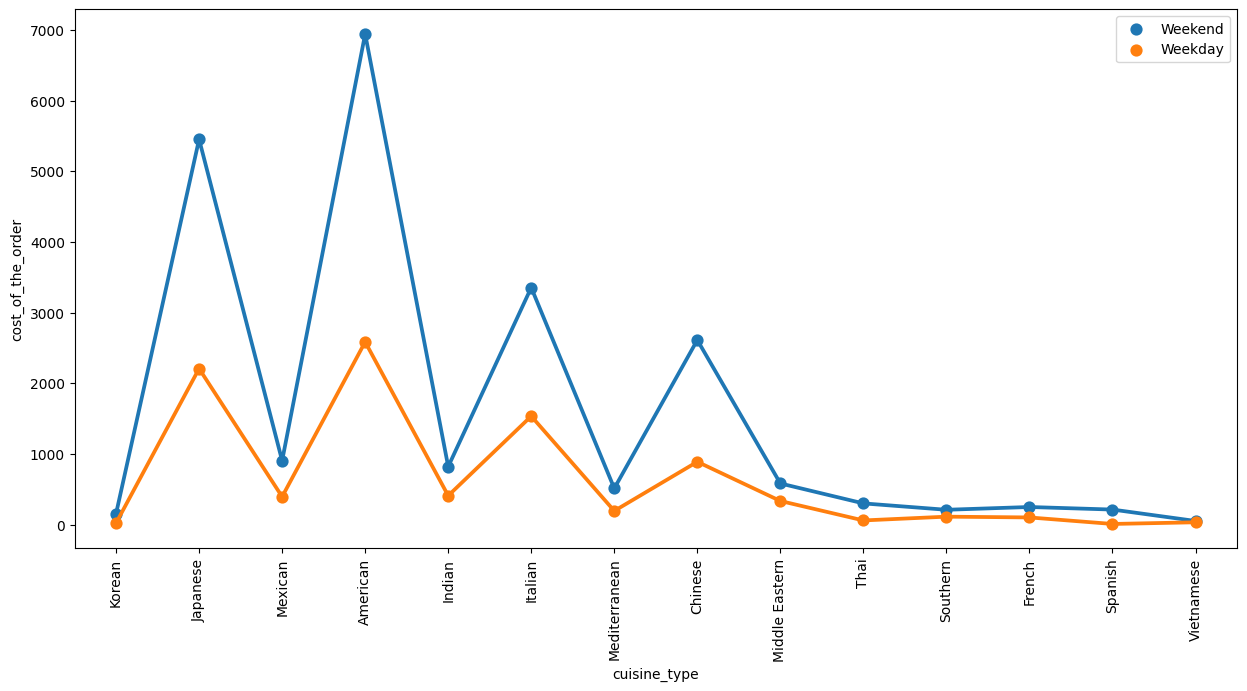

In [78]:
#Find the relationship between 2 categorical variables (day_of_the_week and cuisine_type) with cost_of_the_order
# The below plot shows the relationship between the cost_of_order, cuisine type and day_of_the_week

plt.figure(figsize=(15,7))
sns.pointplot(x='cuisine_type', y='cost_of_the_order', data=clean_df, estimator=sum, ci=None, hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor =(1,1))

**Observations from the above graph**
1. American cuisine is the most popular both over weekdays and weekends, followed by Japanese and Italian cuisine.
2. All the three cuisines have the same trend over weekdays and weekends. This means that American cuisine is liked most and has highest number of orders both during weekdays and weekends.
3. There is a peak in number of orders in American cusine during the weekend which shows that people prefer food that can be made fast and delivered to them over the weekend.

**From the above graph it can be observed that Middle Eastern, Southern, Thai, Spanish, French cuisines are costly**

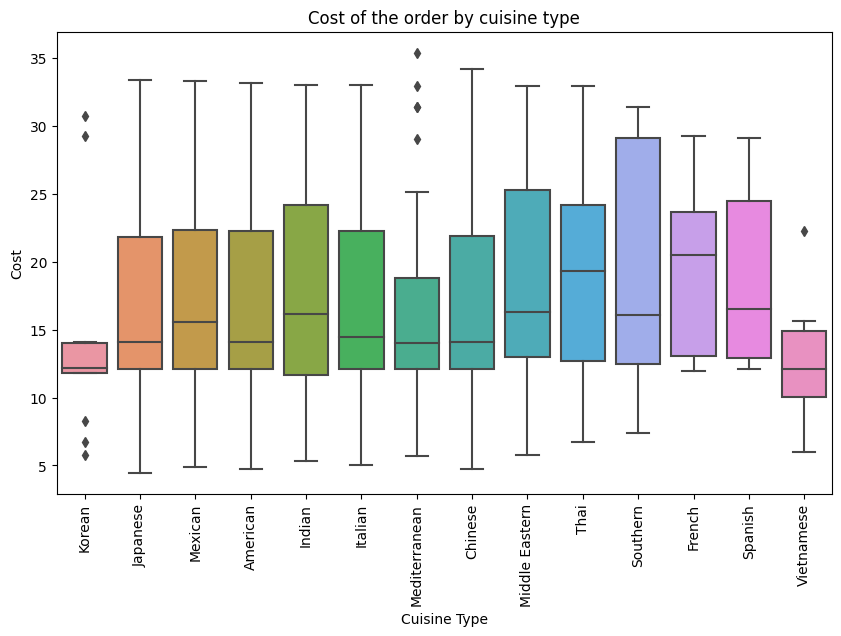

In [79]:
#Boxplot for cost of the order based on cuisine type
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cost of the order by cuisine type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost')
plt.xticks(rotation=90)
plt.show()

Observations:
1. The average cost of Middle Eastern, Thai, French cuisine is higher than the average cost of other cuisines.
2. American, Japanese, Italian cuisines have lower average cost
3. There are few outliers observed in Mediterranean and Korean cuisines, indicating that few of the dishes in the menu are priced either lower or higher than the average cost

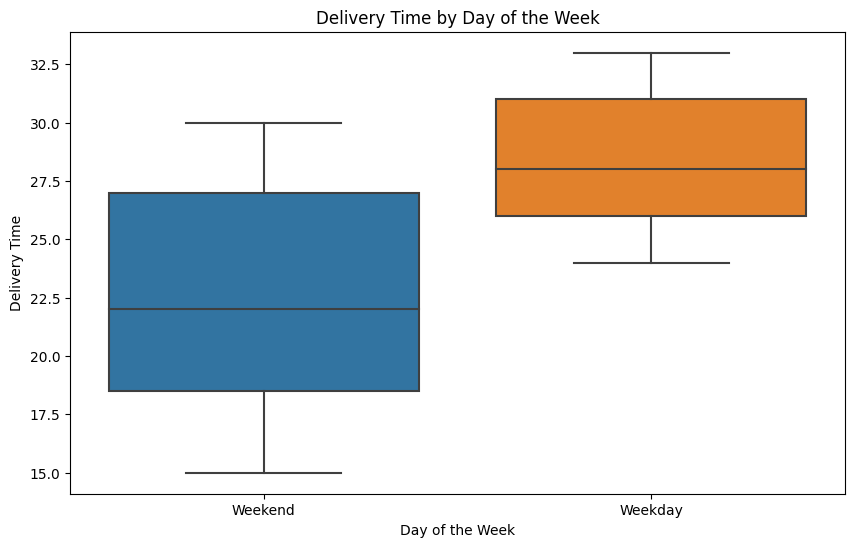

In [80]:
#Boxplot for delivery time based on the day of the week (Weekday or Weekend)
plt.figure(figsize=(10,6))
sns.boxplot(data=clean_df, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

Observations
1. The average delivery time over the weekend is around 22 minutes, while over the weekday is around 28 minutes.
2. The average delivery time over the weekend is low based on the traffic conditions. There is less traffic over weekend as offices are closed, improving the overall delivery time.

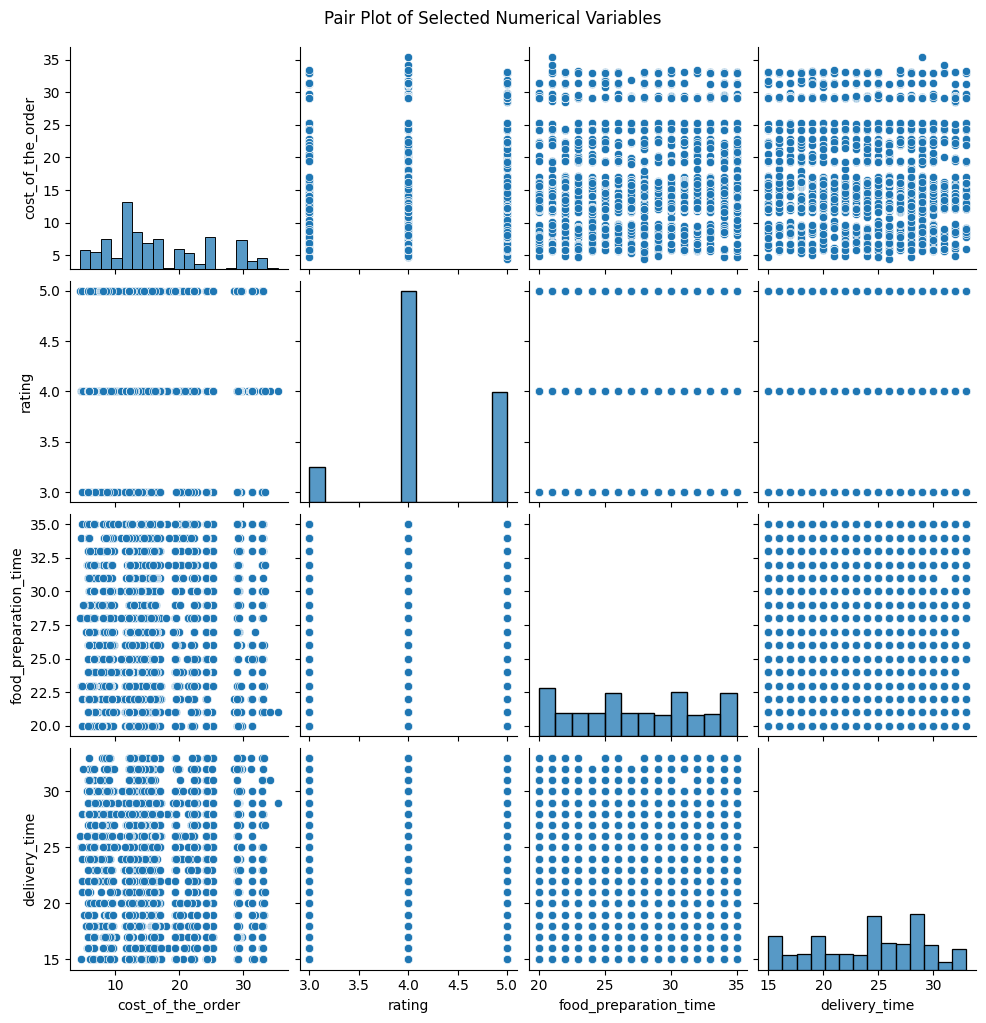

In [81]:
# Pair plot for selected numerical variables
sns.pairplot(clean_df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']]);
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

**Observations**
* There is correlation exists between the rating and food preparation and delivery time.
* food preparation time and delivery time are not correlated

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [82]:
#Create a dataframe that contains the restuarant names and their rating counts
restaurant_df = clean_df.groupby('restaurant_name')['rating'].count().reset_index(name='total_ratings')
restaurant_df

,restaurant_name,total_ratings
0,'wichcraft,1
1,12 Chairs,4
2,5 Napkin Burger,5
3,67 Burger,1
4,Alidoro,1
...,...,...
173,Zero Otto Nove,2
174,brgr,2
175,da Umberto,3
176,ilili Restaurant,18


In [83]:
#Get the restaurant names with rating counts more than 50
high_rating_restaurants = restaurant_df[restaurant_df['total_ratings'] > 50]['restaurant_name']
high_rating_restaurants

20     Blue Ribbon Fried Chicken
21             Blue Ribbon Sushi
109                         Parm
121             RedFarm Broadway
122               RedFarm Hudson
136                  Shake Shack
153            The Meatball Shop
Name: restaurant_name, dtype: object

In [84]:
#Filter to get the data of restaurants (all columns) that have rating count more than 50
df_mean_4 = clean_df[clean_df['restaurant_name'].isin(high_rating_restaurants)].copy()
df_mean_4

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4,28,21
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
18,1477138,47280,RedFarm Hudson,Chinese,14.12,Weekend,4,25,24
...,...,...,...,...,...,...,...,...,...
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,4,22,28
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,4,31,24


In [85]:
# Group the restaurant names with their ratings and find the mean rating of each restaurant
restaurant_names_mean_rating = df_mean_4.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()
restaurant_names_mean_rating

,restaurant_name,rating
0,The Meatball Shop,4.325758
1,Blue Ribbon Fried Chicken,4.218750
2,RedFarm Broadway,4.169492
3,Shake Shack,4.168950
4,Blue Ribbon Sushi,4.134454
5,RedFarm Hudson,4.109091
6,Parm,4.073529


#### Observations:
From the above calculation, the restaurants that fulfill the criteria to get promotional offer are

1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.   RedFarm Broadway
4.   Shake Shack
5.   Blue Ribbon Sushi
6.   RedFarm Hudson
7.   Parm



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [86]:
#Create a new column for revenue in the df dataframe and initialize revenue to 0
df['revenue'] = 0
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0


In [87]:
#Create a function with conditional statements (for each category: 25%, 15% and 0%) and mention the revenue for each condition

def calculate_order_revenue(cost_of_the_order):
  if cost_of_the_order > 20:
    return 0.25 * cost_of_the_order
  elif 5 < cost_of_the_order <= 20:
    return 0.15 * cost_of_the_order
  else:
    pass

In [88]:
#Apply the function to all rows of the df dataframe to populate revenue column

df['revenue'] = df['cost_of_the_order'].apply(calculate_order_revenue)
df.head(5) #checking if revenue was calculated correctly

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [89]:
# Taking summation of the revenue column will give the total revenue generated by the company across all orders
total_net_revenue = df['revenue'].sum()
total_net_revenue


6166.303

#### Observations:
The total revenue generated by the company across all the orders is 6166 dollars and 30 cents

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [90]:
#Create a new column in dataframe df for total_time_to_deliver where total time = preparation time + delivery time
df['total_time_to_deliver'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time_to_deliver
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [91]:
#Find the percentage of orders that take more than 60 mins
perc_orders_above_60_min = (df['total_time_to_deliver']>60).mean()*100
perc_orders_above_60_min

10.537407797681771

#### Observations:
10.54 percent of orders take more than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

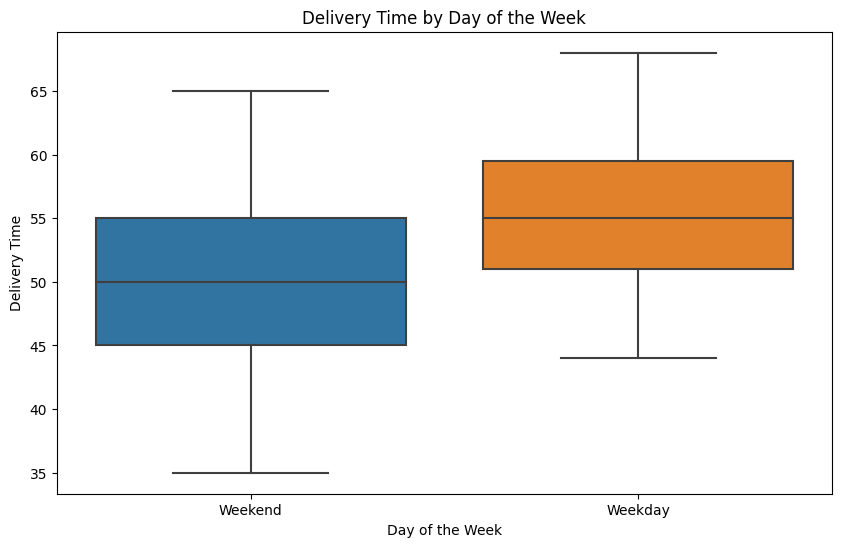

In [92]:
# For this question I am assuming that the delivery time is sum of delivery time + food preparation time. Food has to be prepared and then its delivered.

#Boxplot for delivery time based on the day of the week (Weekday or Weekend)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day_of_the_week', y='total_time_to_deliver')
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

#### **Observations**:
* The average delivery time over weekdays is higher than that of the average delivery time during weekend. Delivery time is dependent on the traffic conditions. As traffic during the weekdays is more due to offices/colleges/schools the time taken to deliver food is much higher than compared to time taken to deliver during the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:
The FoodHub dataset has been analyzed to undersand the demand of different restuarants which has helped to come up with some recommendations that will help the company enhance their customer experience. The data consists of 1898 orders that have been placed by customers on the app along with other details with respect to orders,like the restuarants in which orders are placed, cuisines, cost of orders, delivery time and food preparation time. With the help of descriptive analysis and visualizations, some insights have been drawn as below:

1. American cuisine is most popular both over weekends and weekdays, followed by Japanese and Italian. Vietnamese, Spanish, French and Southern are least favourite cuisines ordered by customers.
2. The time to prepare American cuisine is low compared to all other cuisines. It is oberved that people prefer the cuisine that can be quickly prepared and delivered
3. In terms of cost of food, American, Japanese and Italian cuisines are relatively lower costly than other cuisines.
4.  Time to deliver food during the weekday is much higher than the time taken to deliver food during weekends due to heavy traffic during the weekdays.
5.  The feedback ratings is negatively correlated to the delivery time and food preparation time, and implies that food that is delivered faster has higher rating. The dataset had around 39% orders that were not rated.
6. There are more orders placed during the weekends as compared to the orders placed during weekdays
7. On average the cost of order is 16.49 dollars. The min cost is 4.47 dollars and maximum cost of order is 35.41 dollars
8. The minimum time for food to be prepared once the order is placed is 20min, average time is 27.37min and maximum time for food to be prepared is 35min
9. The average time to deliver food is 24.16 minutes, minimum time is 15 minutes and maximum time is 33 minutes. This indicates the time once food has been picked up from the restuarant and the order is delivered to customer.

### **Recommendations**:

1.  *Tie up with more restaurants that offer American, Japanese and Italian cuisines.* From the above it has been observed that American cuisine is the most popular, followed by Japanese and Italian cuisine.  For the company to increase the profits, it should tie up with more restaurants that offer American, Japanese and Italian cuisine.
2. *The company should not invest in restaurants that offer Vietnamese, Spanish, French and Southern cuisines* as these are the least preferred cuisines and very low number of orders.
3. As there is a high correlation between customer rating and the time to deliver food, *the company should focus on optimizing delivery processes to reduce delivery times and allocation of resources to orders that can be delivered fastest. The company can also offer express or priority food delivery options by charging slightly more.* More data should be collected in terms of shortest and least busy routes, to perform further analysis on food delivery.
4. As the demand of food orders is higher during the weekends, *the company should look for increasing the resourcing (delivery boys) during the weekends by offering part time jobs for weekends*, hence enhancing customer experience.
5. Customer ratings play a crucial role in analyzing customer experience. *The company should provide some offers/deals to customers who provide rating on the app and do have repeat orders.* That way data analytics will be more accurate and the company can focus on strategies for enhancing customer experience.
6. *The company should leverage data analytics to provide personalized food recommendations based on customer preferences and order history.*
7. *The company can offer some loyalty programs and discounts to reward frequenct customers.*



---